In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import os
import re
import copy
import json

In [12]:
PIECES_TO_NUM = {
    "square": 0,
    "white_pawn": 1,
    "white_rook": 2,
    "white_knight": 3,
    "white_bishop": 4,
    "white_king": 5,
    "white_queen": 6,
    "white_unknown": 7,
    "black_pawn": -1,
    "black_rook": -2,
    "black_knight": -3,
    "black_bishop": -4,
    "black_king": -5,
    "black_queen": -6,
    "black_unknown": -7,
}

NUM_TO_PIECE = {
    0: "square",
    1: "white_pawn",
    2: "white_rook",
    3: "white_knight",
    4: "white_bishop",
    5: "white_king",
    6: "white_queen",
    7: "white_unknown",
    -1: "black_pawn",
    -2: "black_rook",
    -3: "black_knight",
    -4: "black_bishop",
    -5: "black_king",
    -6: "black_queen",
    -7: "black_unknown"
}

In [13]:
piece_images = {
    piece: Image.open(f'assets/{piece}.png') for piece in PIECES_TO_NUM.keys() if piece != "square"
}

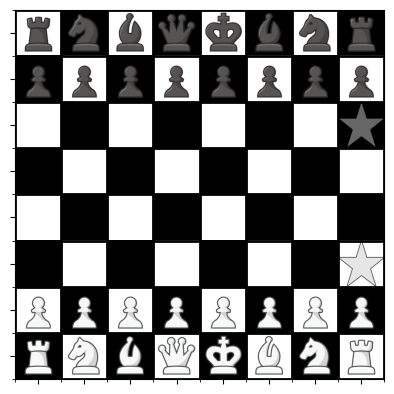

In [21]:
game_state = np.array([
    [-2, -3, -4, -6, -5, -4, -3, -2],
    [-1, -1, -1, -1, -1, -1, -1, -1],
    [ 0,  0,  0,  0,  0,  0,  0,  -7],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  7],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 2,  3,  4,  6,  5,  4,  3,  2],
])

def draw_chessboard(board, save=False):
    board = np.flipud(board)
    fig, ax = plt.subplots()

    chessboard_pattern = np.zeros((8, 8))
    chessboard_pattern[1::2, ::2] = 1
    chessboard_pattern[::2, 1::2] = 1

    ax.imshow(chessboard_pattern, cmap='gray', interpolation='none')

    for i in range(8):
        for j in range(8):
            piece_value = board[i, j]
            if piece_value != 0:
                piece_name = NUM_TO_PIECE[piece_value]
                piece_image = piece_images[piece_name]
                ax.imshow(piece_image, extent=[j - 0.5, j + 0.5, i - 0.5, i + 0.5])

    ax.set_xticks(np.arange(8))
    ax.set_yticks(np.arange(8))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks(np.arange(-0.5, 8, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 8, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)

    if save:
        fig.savefig(f"{save}.png")

    #plt.show()
    matplotlib.pyplot.close()
    
draw_chessboard(game_state)

In [15]:
def modify_game_state(game_state, move):
    new_game_state = copy.copy(np.flipud(game_state)) # A1 is 0,0
    if " -> " in move:
        init_pos = move.split(" -> ")[0]
        new_pos = move.split(" -> ")[1]

        init_y_pos = int(init_pos[-1]) - 1
        init_x_pos = int(ord(init_pos[-2]) - 96 - 1)

        new_y_pos = int(new_pos[-1]) - 1
        new_x_pos = int(ord(new_pos[-2]) - 96 - 1)      

        piece = new_game_state[init_y_pos, init_x_pos]
        new_game_state[init_y_pos, init_x_pos] = 0
        new_game_state[new_y_pos, new_x_pos] = piece

    elif " + " in move:
        init_pos = move.split(" + ")[0]
        new_pos = move.split(" + ")[1]

        init_y_pos = int(init_pos[-1]) - 1
        init_x_pos = int(ord(init_pos[-2]) - 96 - 1)

        new_y_pos = int(new_pos[-1]) - 1
        new_x_pos = int(ord(new_pos[-2]) - 96 - 1)      

        piece = new_game_state[init_y_pos, init_x_pos]
        new_game_state[init_y_pos, init_x_pos] = 0
        new_game_state[new_y_pos, new_x_pos] = piece

    elif " x " in move:
        init_pos = move.split(" x ")[0]
        new_pos = move.split(" x ")[1]

        init_y_pos = int(init_pos[-1]) - 1
        init_x_pos = int(ord(init_pos[-2]) - 96 - 1)

        new_y_pos = int(new_pos[-1]) - 1
        new_x_pos = int(ord(new_pos[-2]) - 96 - 1)      

        piece = new_game_state[init_y_pos, init_x_pos]
        new_game_state[init_y_pos, init_x_pos] = 0
        new_game_state[new_y_pos, new_x_pos] = piece

    elif "O-O-O" in move:
        if move[0] == "w":
            new_game_state[0, 2] = new_game_state[0, 4]
            new_game_state[0, 3] = new_game_state[0, 0]
            new_game_state[0, 0] = 0
            new_game_state[0, 4] = 0
        else:
            new_game_state[7, 2] = new_game_state[7, 4]
            new_game_state[7, 3] = new_game_state[7, 0]
            new_game_state[7, 0] = 0
            new_game_state[7, 4] = 0

    elif "O-O" in move:
        if move[0] == "w":
            new_game_state[0, 6] = new_game_state[0, 4]
            new_game_state[0, 5] = new_game_state[0, 7]
            new_game_state[0, 7] = 0
            new_game_state[0, 4] = 0
        else:
            new_game_state[7, 6] = new_game_state[7, 4]
            new_game_state[7, 5] = new_game_state[7, 7]
            new_game_state[7, 7] = 0
            new_game_state[7, 4] = 0
        

    return np.flipud(new_game_state)

In [16]:
# "->" is a move
# "x" is a capture
# "+" is check
# "#" is checkmate
# "O-O" is kingside castle
# "O-O-O" is queenside castle
game = [
    "Ng1 -> Nf3",
    "d7 -> d5",
    "g2 -> g3",
    "c7 -> c5",
    "Bf1 -> Bg2",
    "Nb8 -> Nc6",
    "wO-O",
    "e7 -> e5",
    "d2 -> d3",
    "Bf8 -> Be7",
    "e2 -> e4",
    "d5 -> d4",
    "Nb1 -> Nd2",
    "h7 -> h5",
    "Nd2 -> Nc4",
    "Qd8 -> Qc7",
    "a2 -> a4",
    "h5 -> h4",
    "Nf3 x Nh4",
    "Be7 x Bh4",
    "g3 x h4",
    "Bc8 -> be6",
    "f2 -> f4",
    "Be6 x Bc4",
    "d3 x c4",
    "Qc7 -> Qe7",
    "Ra1 -> Ra3",
    "Rh8 x Rh4",
    "Ra3 -> Rg3",
    "Ng8 -> Nf6",
    "f4 x e5",
    "Nc6 x Ne5",
    "Rg3 x Rg7",
    "Qe7 -> Qf8",
    "Rg7 -> Rg5",
    "Nf6 -> Nd7",
    "Bc1 -> Bf4",
    "Qf8 -> Qh8",
    "Qd1 -> Qe1",
    "f7 -> f6",
    "Bf4 x Be5",
    "Nd7 x Ne5",
    "Rf1 x Rf6",
    "Ne5 x Nc4",
    "Rf6 -> Rg6",
    "Ke8 -> Kd7",
    "Rg6 + Rg7",
    "Kd7 -> Kc6",
    "Rg5 + Rg6",
    "Nc4 -> Nd6",
    "e4 -> e5"
]

In [17]:
data = {} # data contains the list of the move and the game_state + frame_number after each move
data["moves"] = game
data["game_states"] = []

In [18]:
initial_game_state = np.array([
    [-2, -3, -4, -6, -5, -4, -3, -2],
    [-1, -1, -1, -1, -1, -1, -1, -1],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 2,  3,  4,  6,  5,  4,  3,  2],
])

# We always 
data["game_states"].append({"frame": 0,
                            "gs": initial_game_state.tolist()
                           })

draw_chessboard(initial_game_state, "game1/gs_0")

new_gs = modify_game_state(initial_game_state, game[0])

# In you case, the frame number won't be 1, this is just an example here.
data["game_states"].append({"frame": 1,
                            "gs": new_gs.tolist()
                           })
draw_chessboard(new_gs, "game1/gs_1")

for i, g in enumerate(game[1:]):
    new_gs = modify_game_state(new_gs, g)
    data["game_states"].append({"frame": i+2,
                            "gs": new_gs.tolist()
                           })
    draw_chessboard(new_gs, f"game1/gs_{i+2}")

In [19]:
# save the data in a json file
json.dump(data, open("game1.json", "w"))

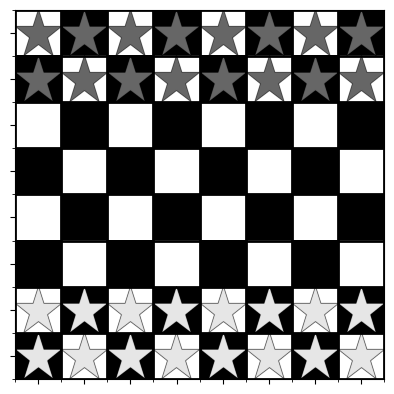

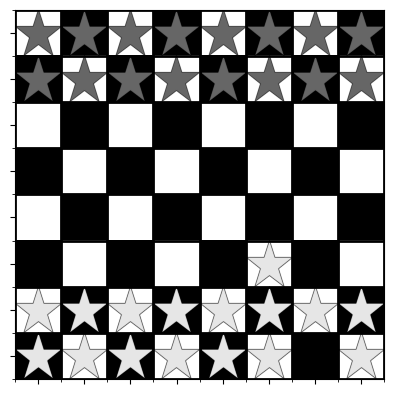

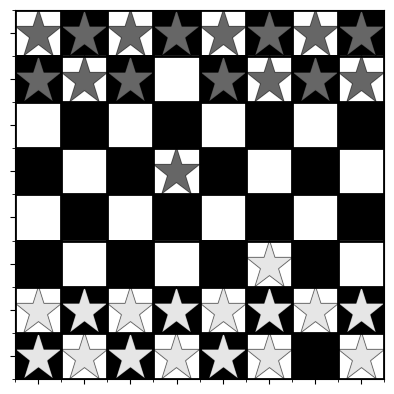

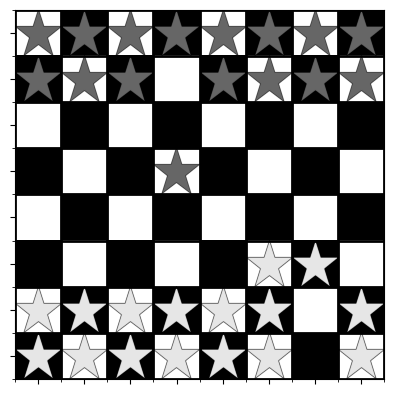

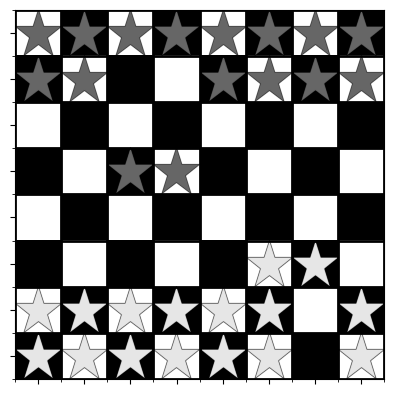

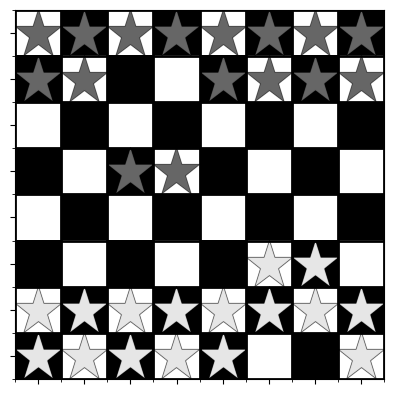

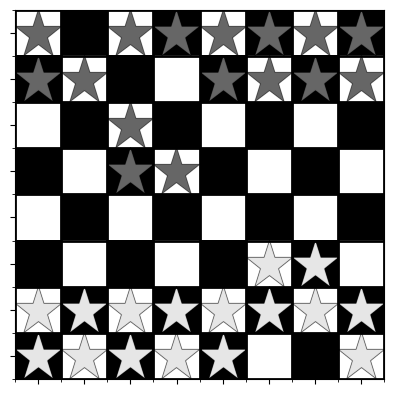

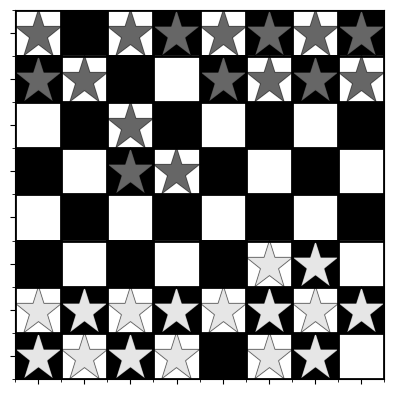

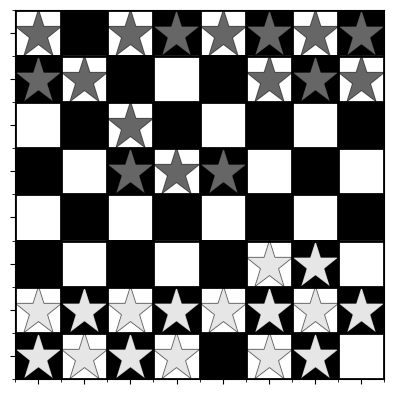

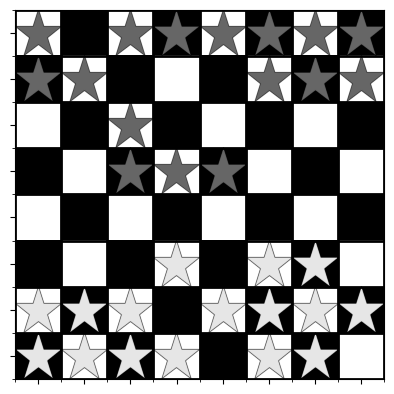

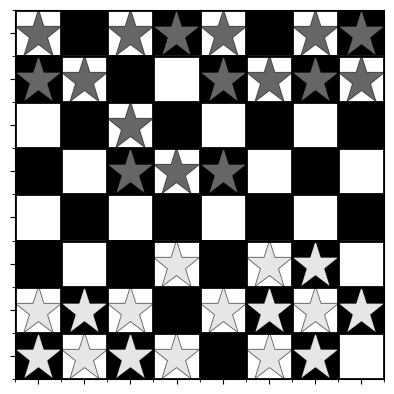

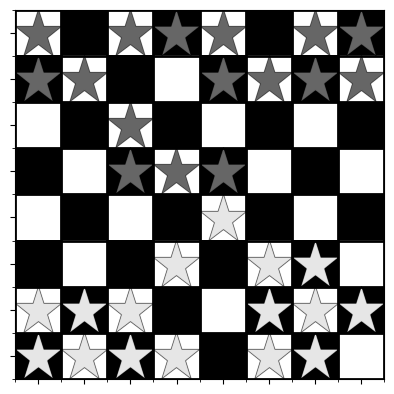

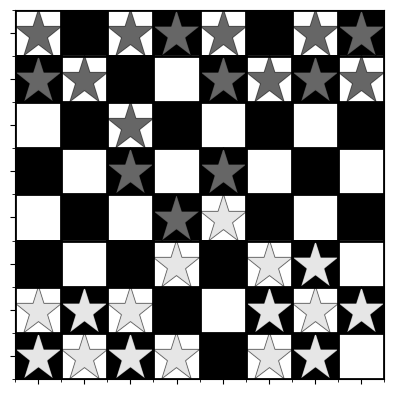

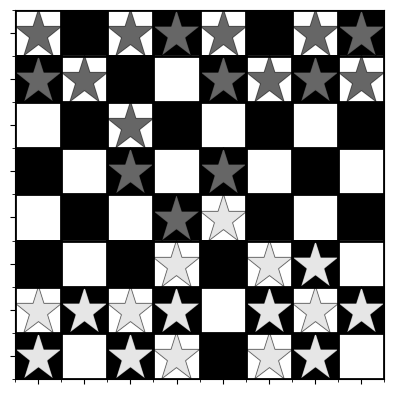

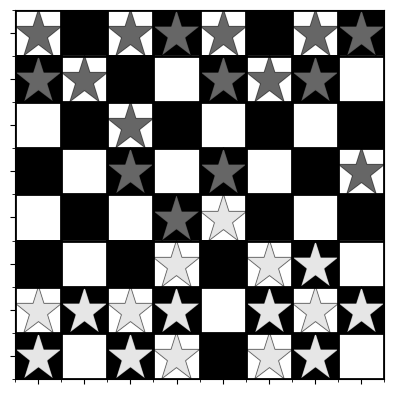

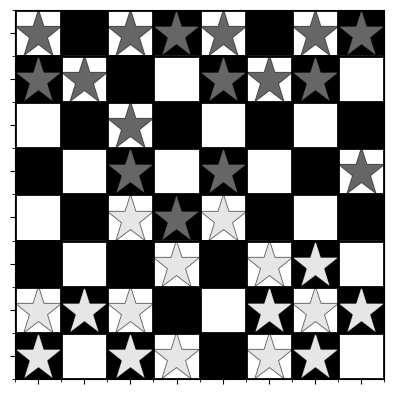

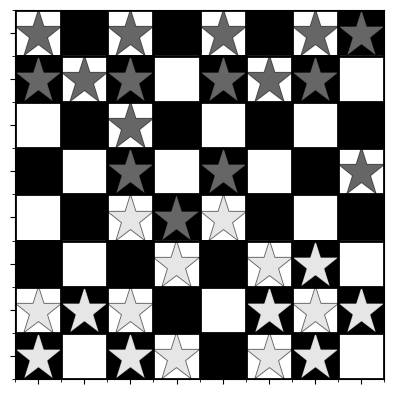

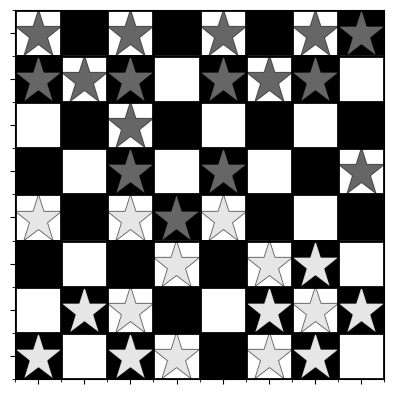

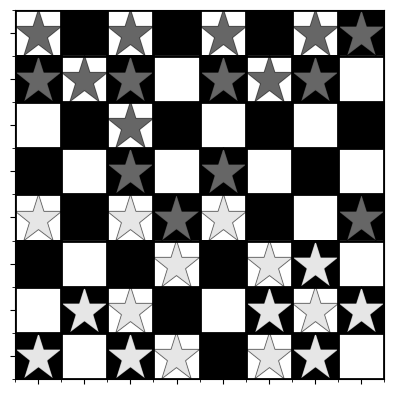

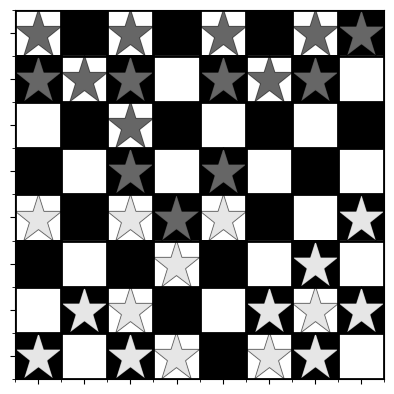

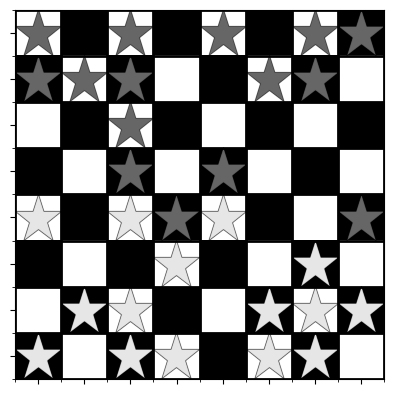

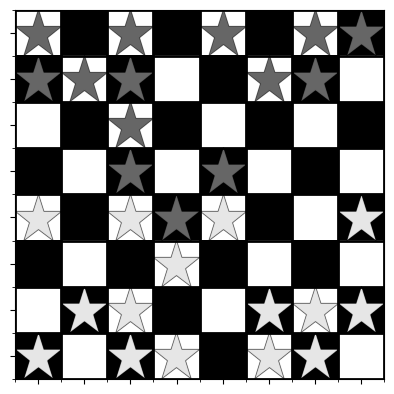

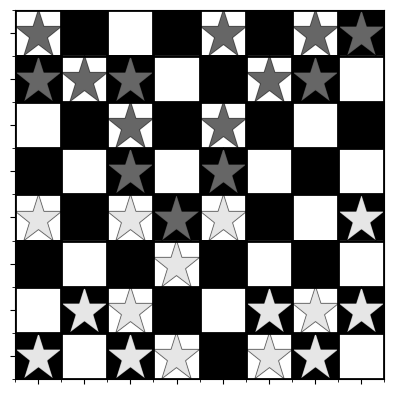

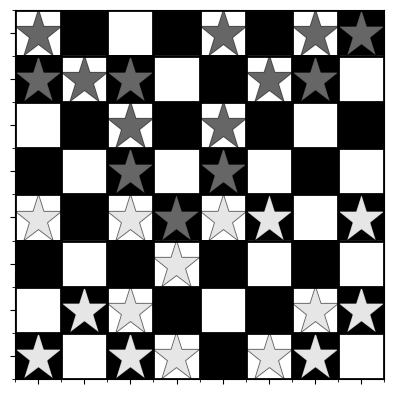

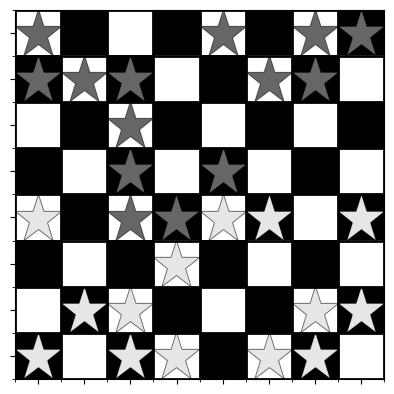

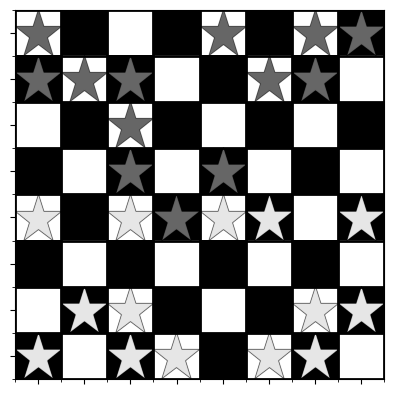

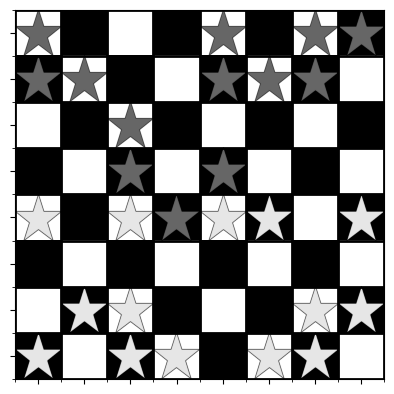

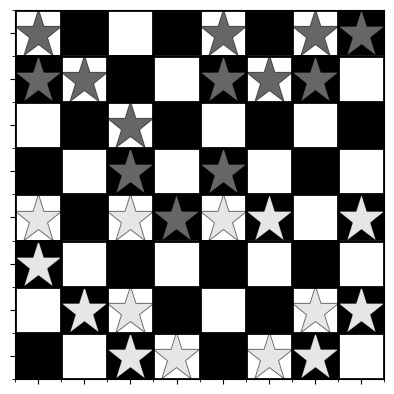

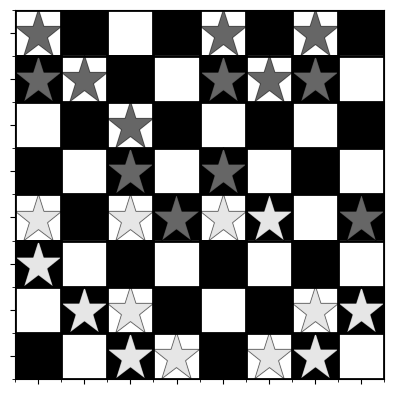

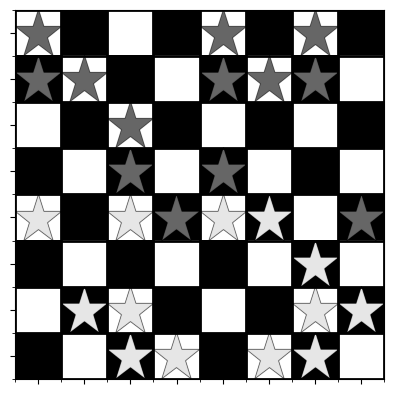

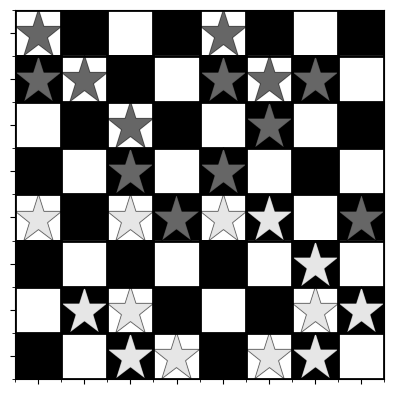

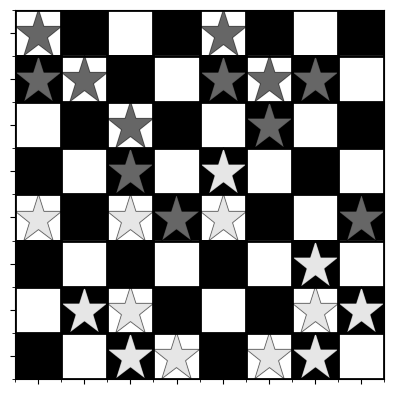

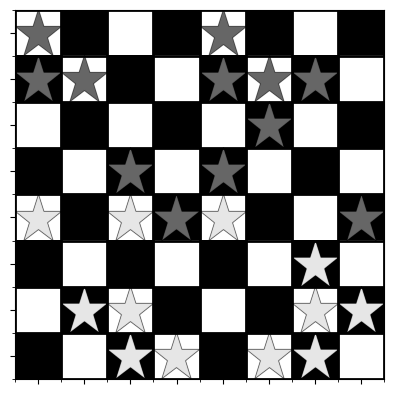

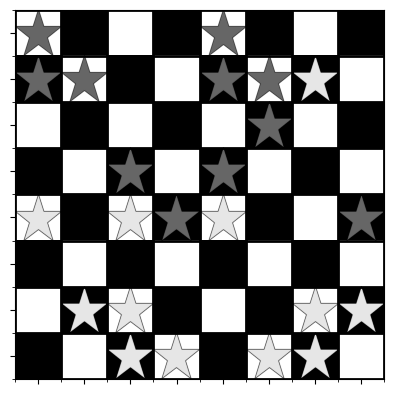

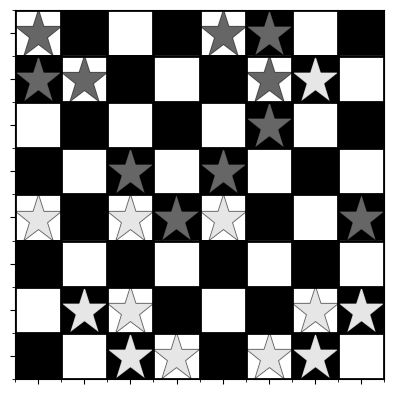

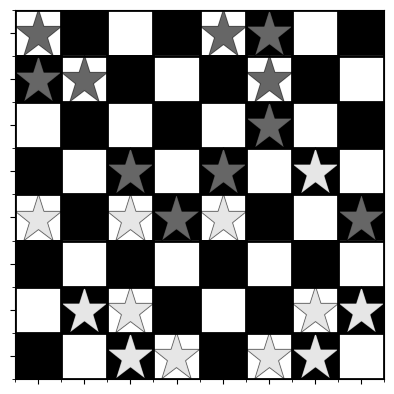

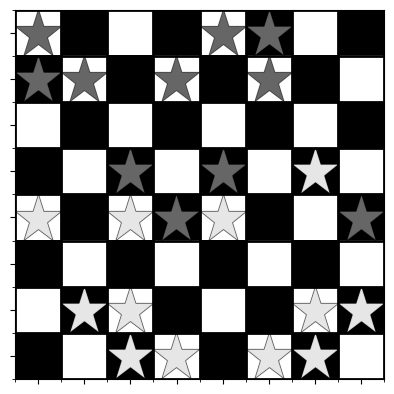

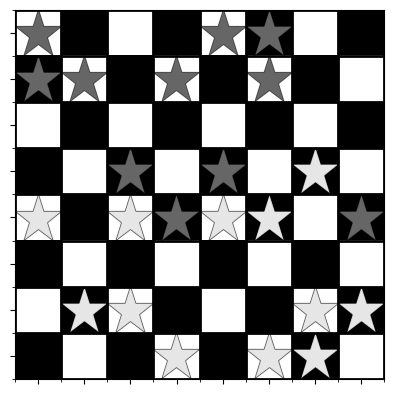

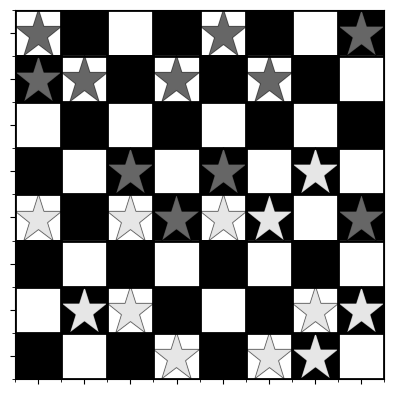

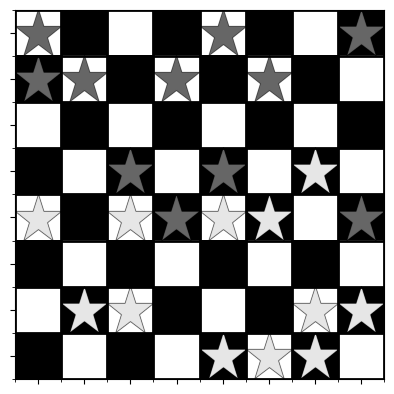

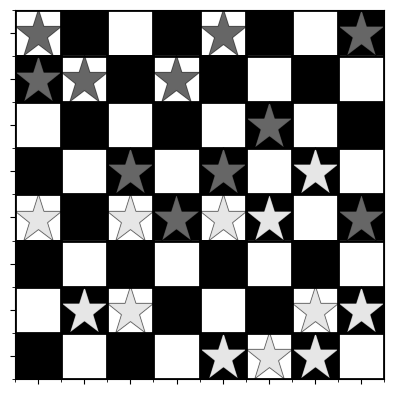

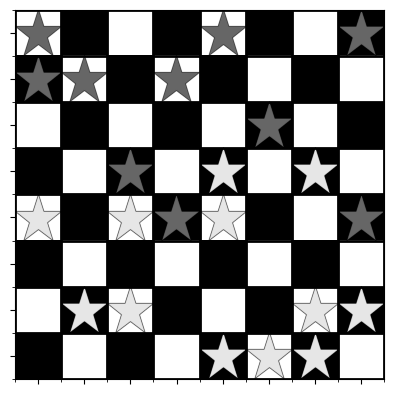

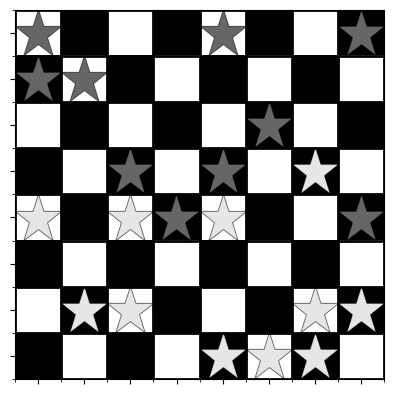

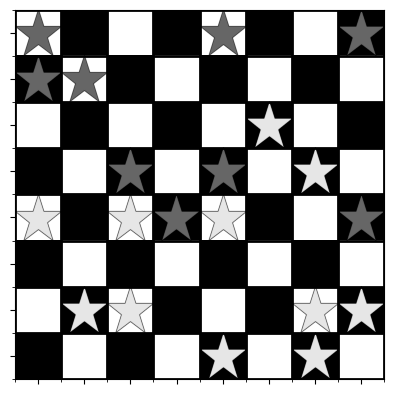

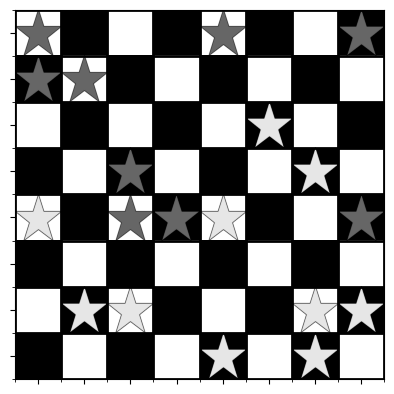

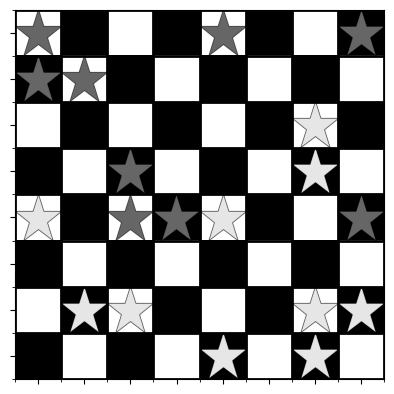

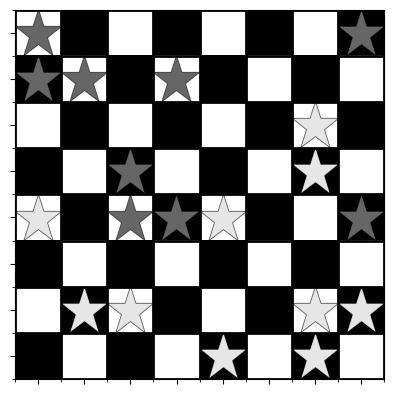

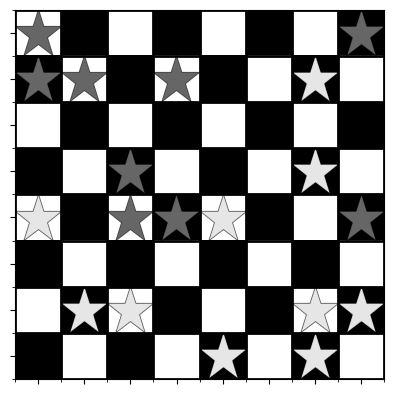

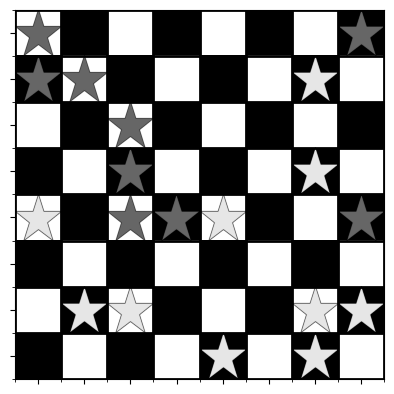

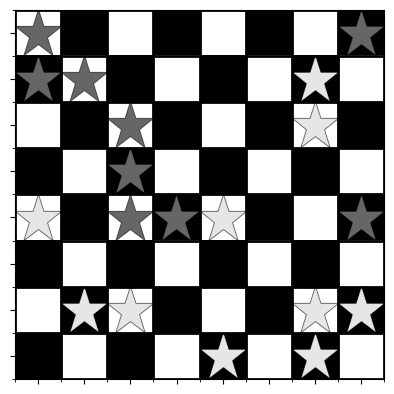

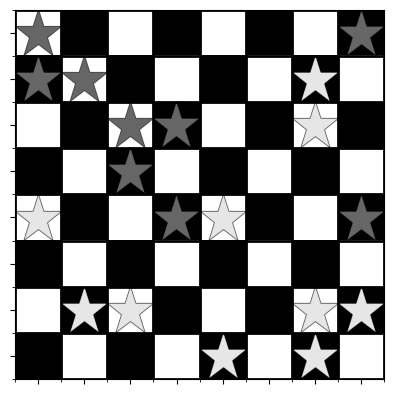

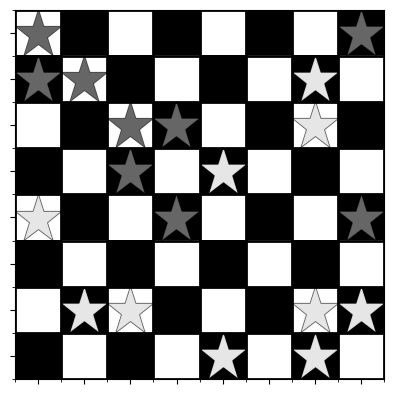

In [23]:
initial_game_state[0, :] = -7
initial_game_state[1, :] = -7

initial_game_state[6, :] = 7
initial_game_state[7, :] = 7

draw_chessboard(initial_game_state, "unknown1/gs_0")

new_gs = modify_game_state(initial_game_state, game[0])
draw_chessboard(new_gs, "unknown1/gs_1")

for i, g in enumerate(game[1:]):
    new_gs = modify_game_state(new_gs, g)
    draw_chessboard(new_gs, f"unknown1//gs_{i+2}")

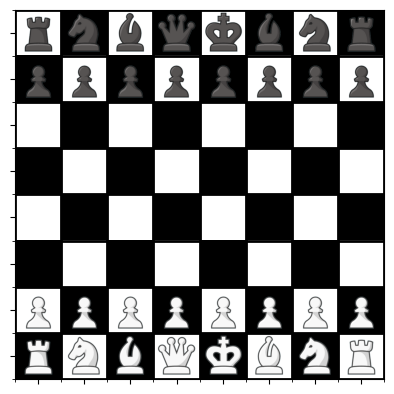

In [22]:
# You can retrieve the game state from the json file
# but don't forget to convert the list to a numpy array
draw_chessboard(np.array(data["game_states"][0]["gs"]))